In [1]:
import pandas as pd
import numpy as np

from category_encoders import OneHotEncoder
import skimpy as sk
import pytimetk as tk

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Supress warnings
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
# Load the data
df = pd.read_csv('../data/raw_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 614 rows of 13 columns
Loan_ID:            object            ['LP001002', 'LP001003', 'LP001005 ...
Gender:             object            ['Male', 'Male', 'Male', 'Male', ' ...
Married:            object            ['No', 'Yes', 'Yes', 'Yes', 'No',  ...
Dependents:         object            ['0', '1', '0', '0', '0', '2', '0' ...
Education:          object            ['Graduate', 'Graduate', 'Graduate ...
Self_Employed:      object            ['No', 'No', 'Yes', 'No', 'No', 'Y ...
ApplicantIncome:    int64             [5849, 4583, 3000, 2583, 6000, 541 ...
CoapplicantIncome:  float64           [0.0, 1508.0, 0.0, 2358.0, 0.0, 41 ...
LoanAmount:         float64           [nan, 128.0, 66.0, 120.0, 141.0, 2 ...
Loan_Amount_Term:   float64           [360.0, 360.0, 360.0, 360.0, 360.0 ...
Credit_History:     float64           [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ...
Property_Area:      object            ['Urban', 'Rural', 'Urban', 'Urban ...
Loan_Status:  

In [4]:

irrelevant_features = ["Loan_ID"]

df.drop(
    columns=irrelevant_features,
    inplace=True
)

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Married': df['Married'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].mean(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0],
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)

In [7]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# Remove outliers using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column.between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

df = df[remove_outliers(df['ApplicantIncome'])]
df = df[remove_outliers(df['CoapplicantIncome'])]
df = df[remove_outliers(df['LoanAmount'])]

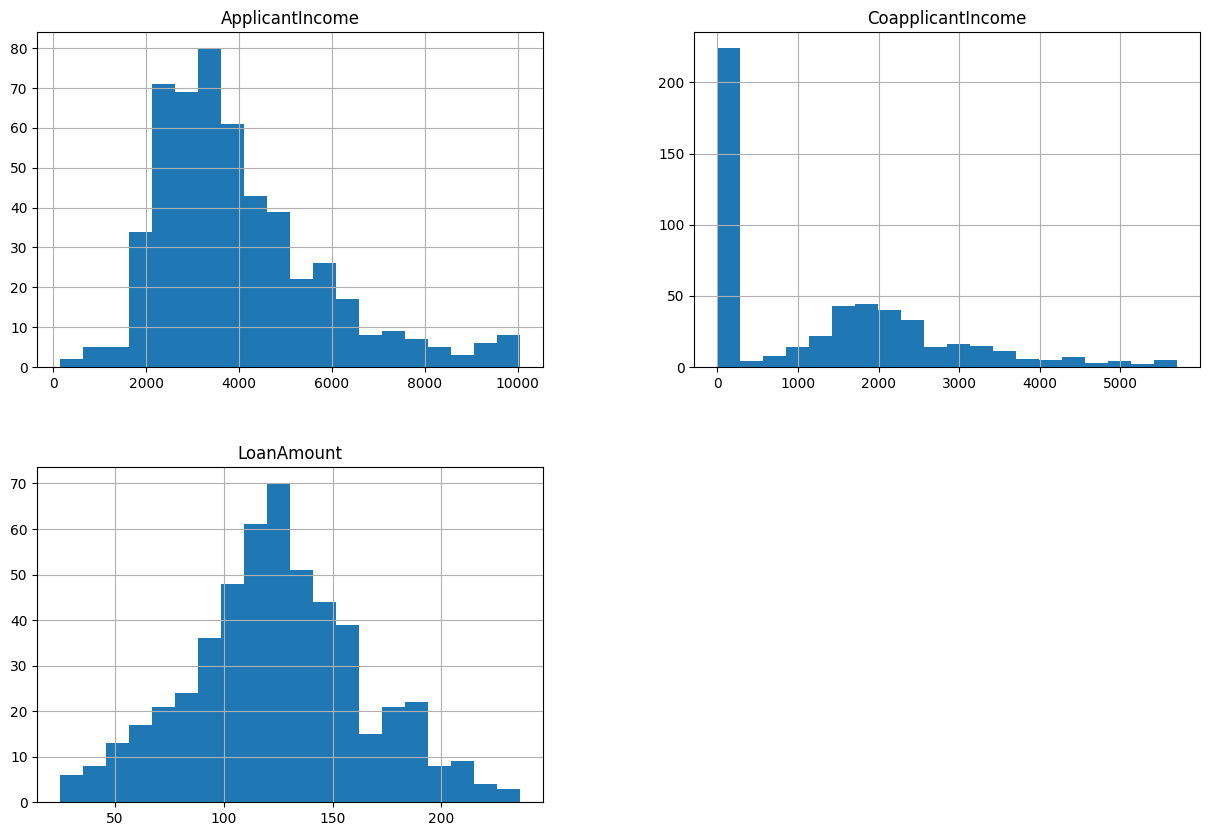

In [9]:
# #Univariate
# #Numerical variables
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

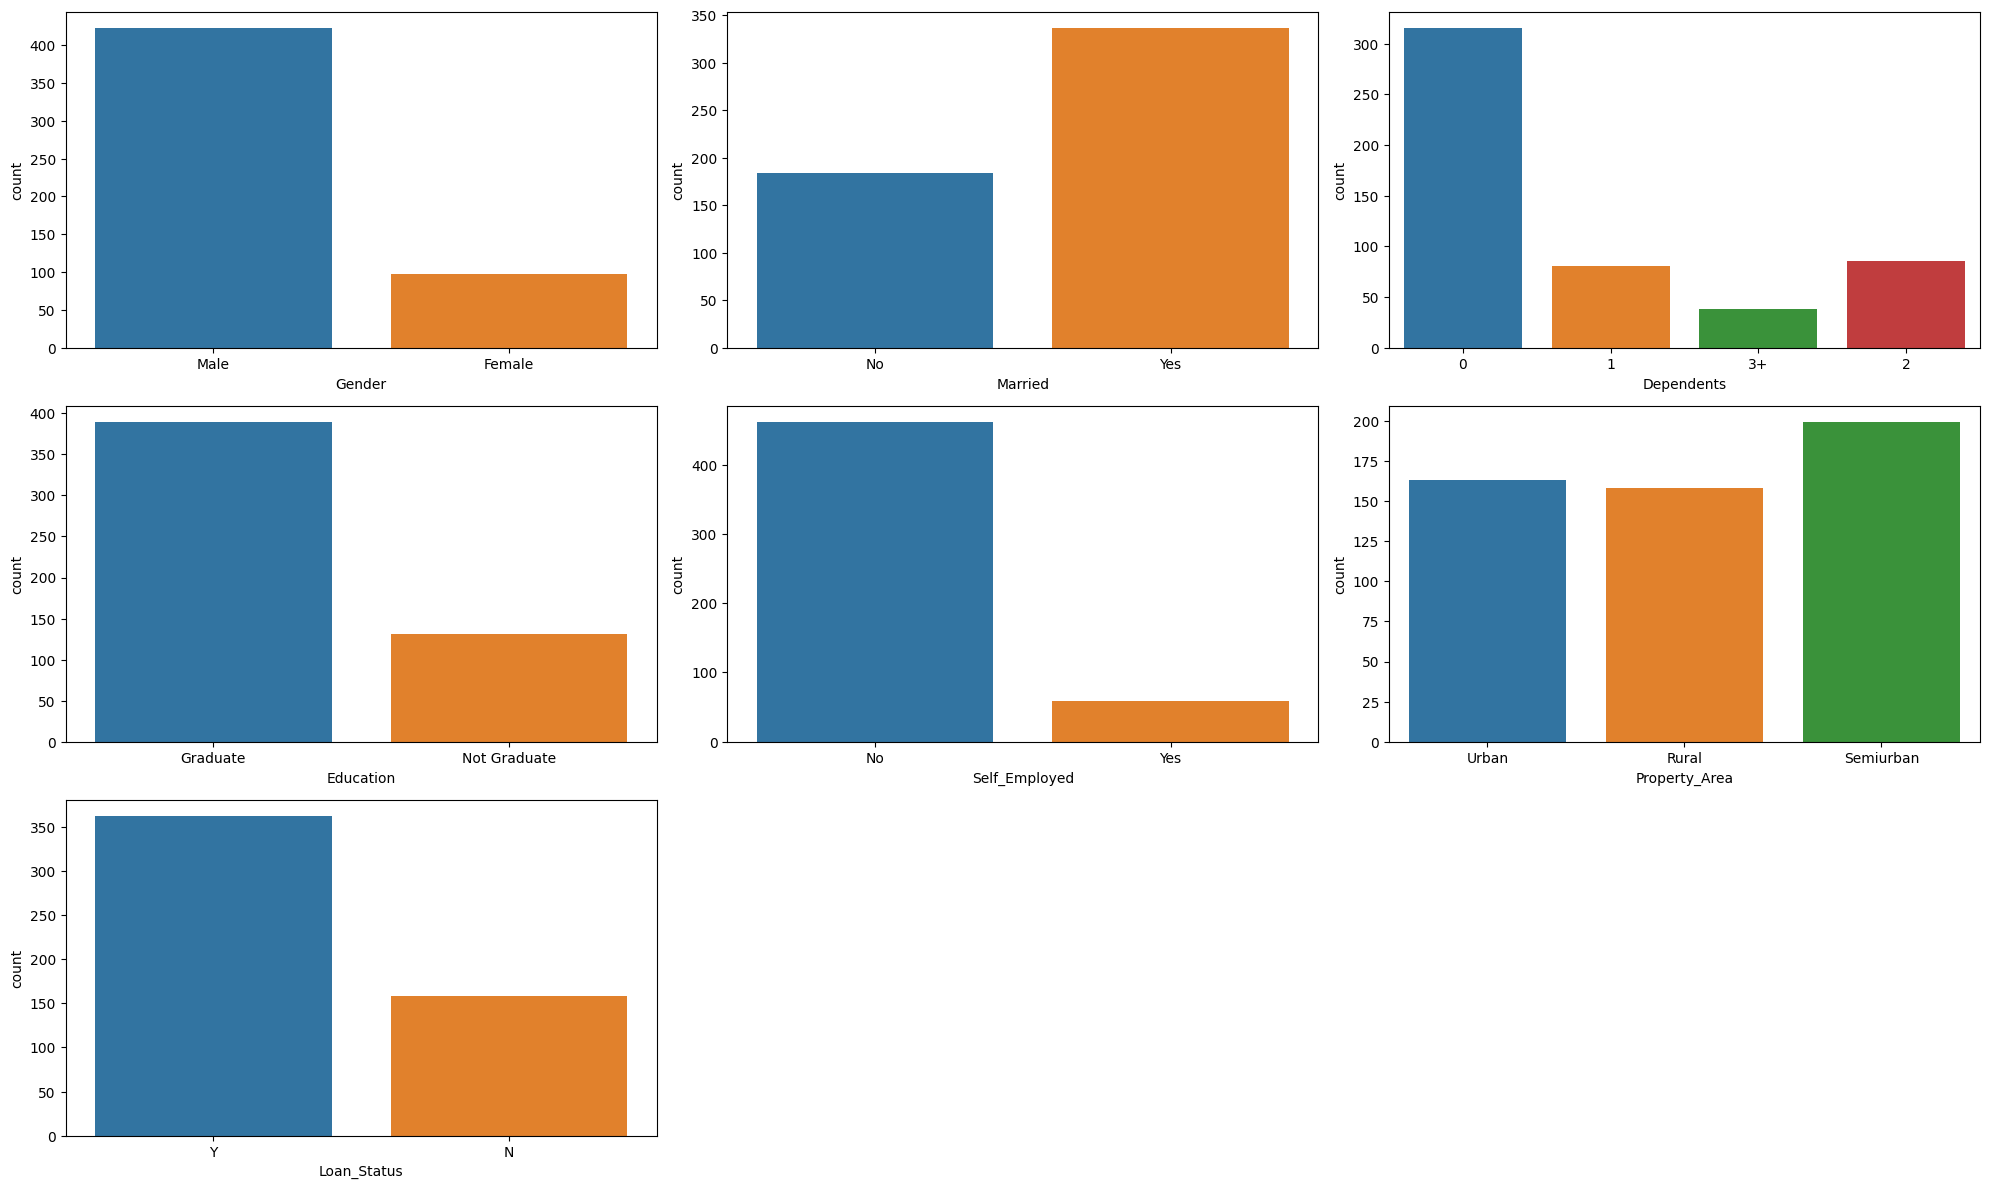

In [10]:
#Categorical variables
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i//3, i%3])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.tight_layout()
plt.show()

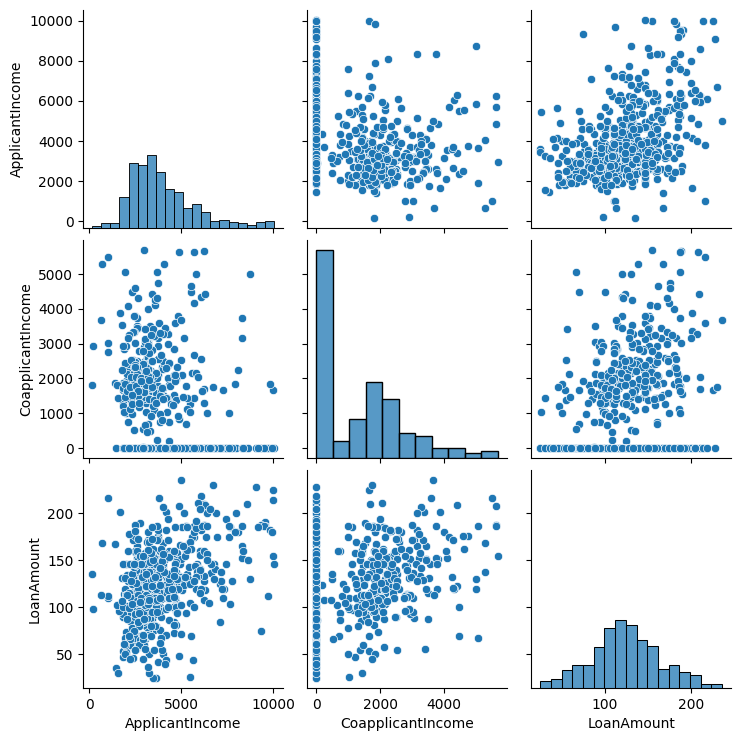

In [11]:
#Bivariate
#Numerical v Numerical
sns.pairplot(df[numerical_features])
plt.show()

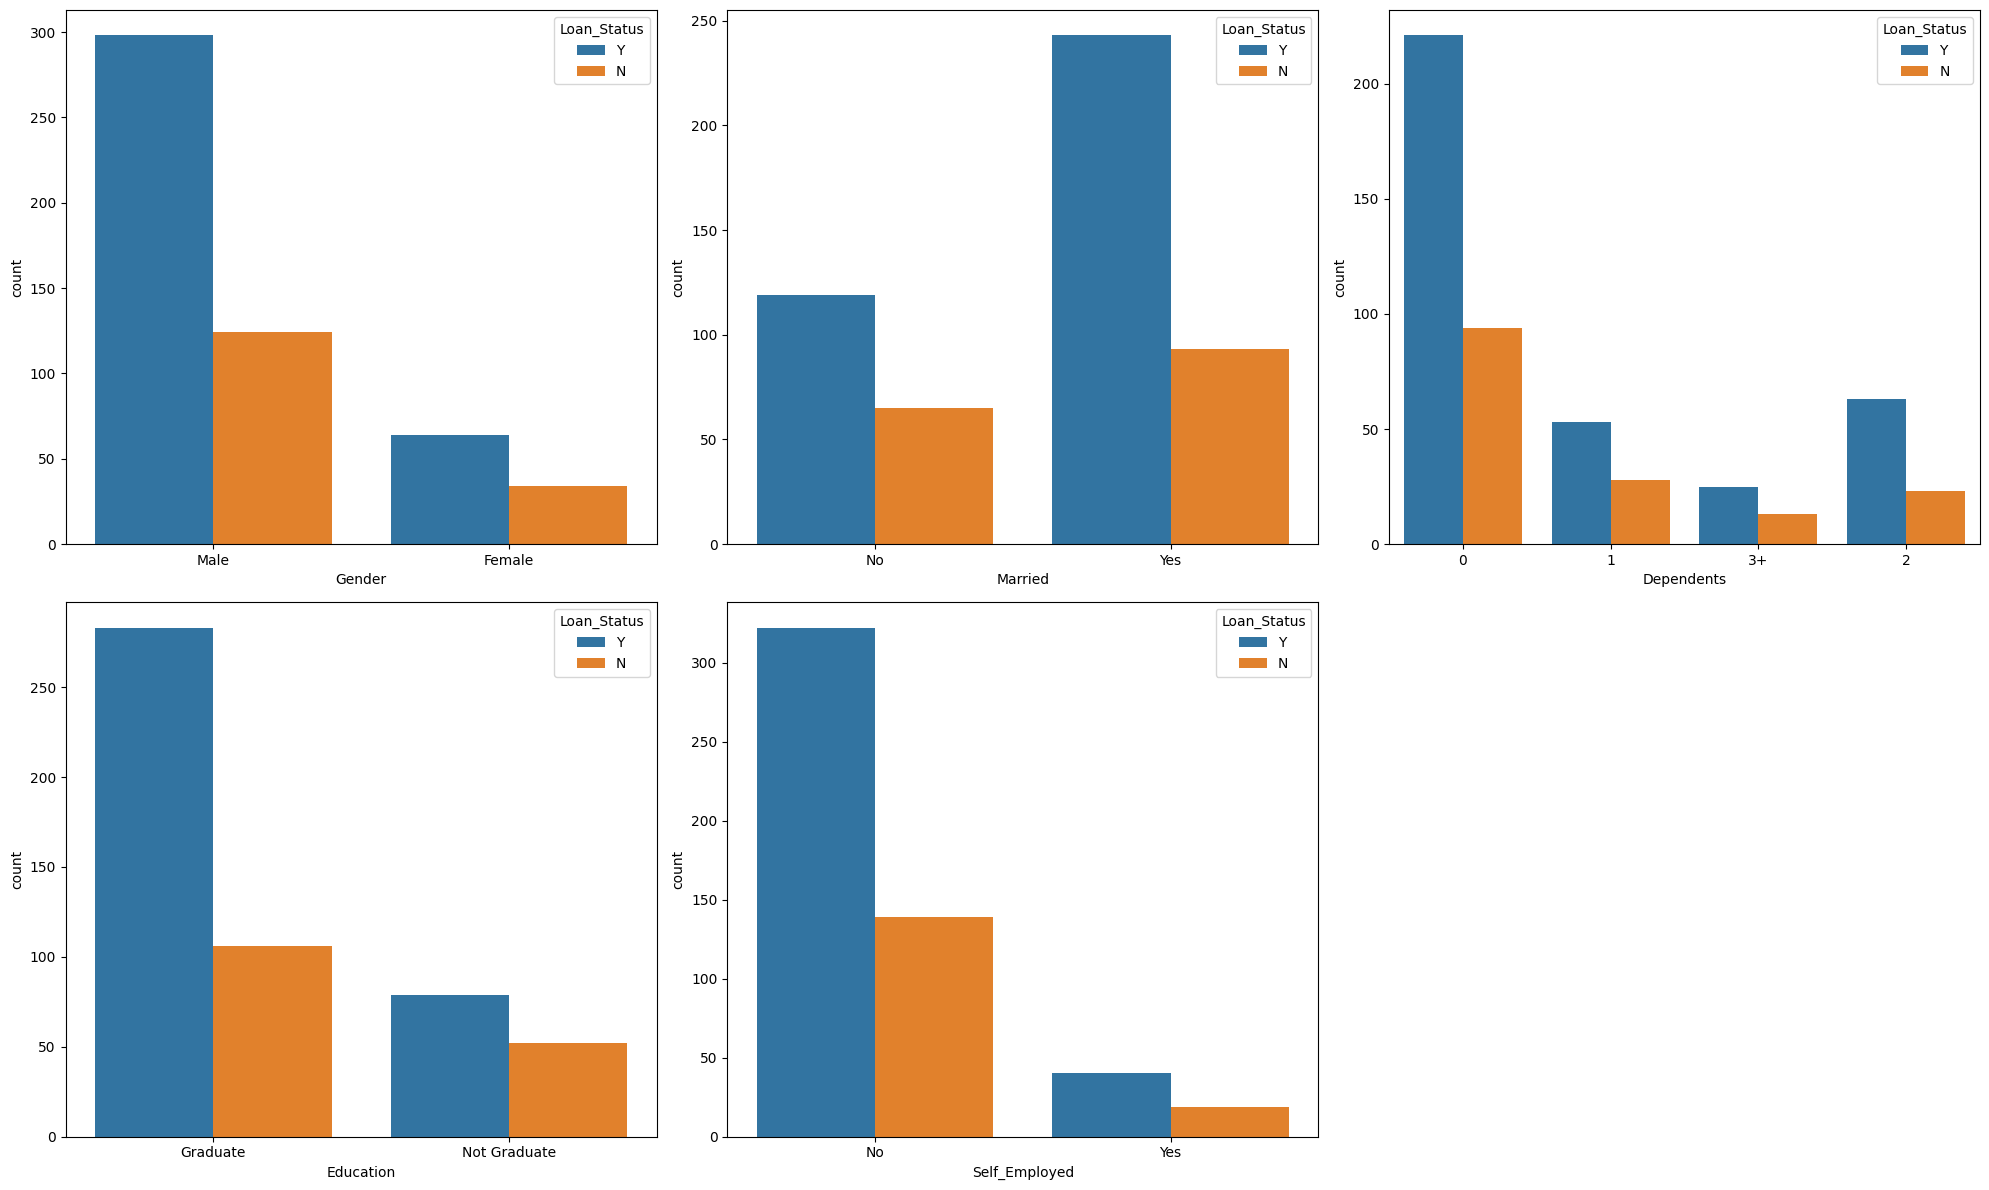

In [12]:
#Categorical vs. categorical
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i, feature in enumerate(categorical_features[:-1]):
    sns.countplot(x=feature, hue='Loan_Status', data=df, ax=axes[i//3, i%3])
fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

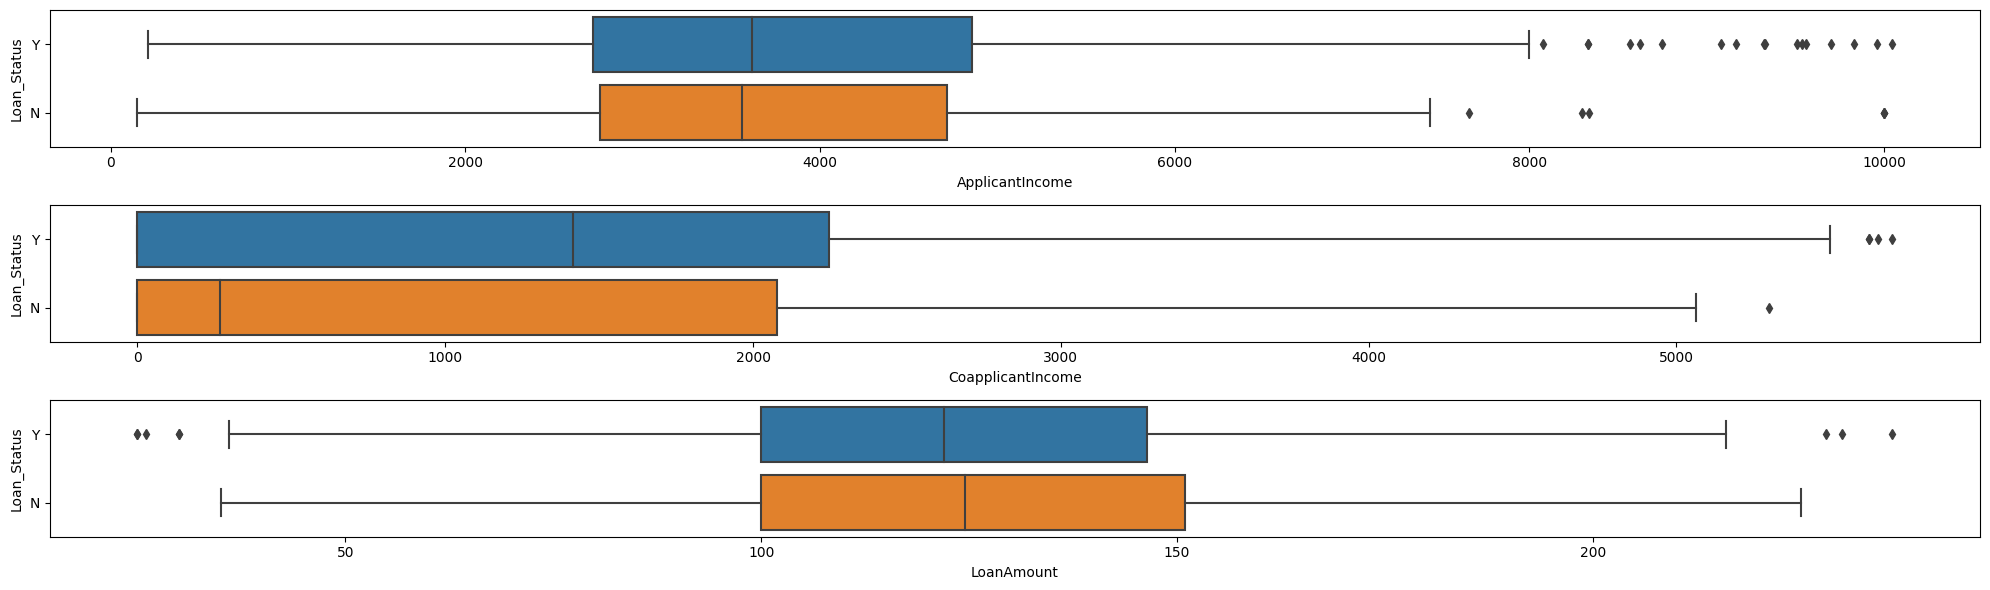

In [13]:
#Numerical vs. categorical
fig, axes = plt.subplots(3, 1, figsize=(20, 6))
for i, feature in enumerate(numerical_features):
    sns.boxplot(y='Loan_Status', x=feature, data=df, ax=axes[i])
plt.tight_layout()
plt.show()

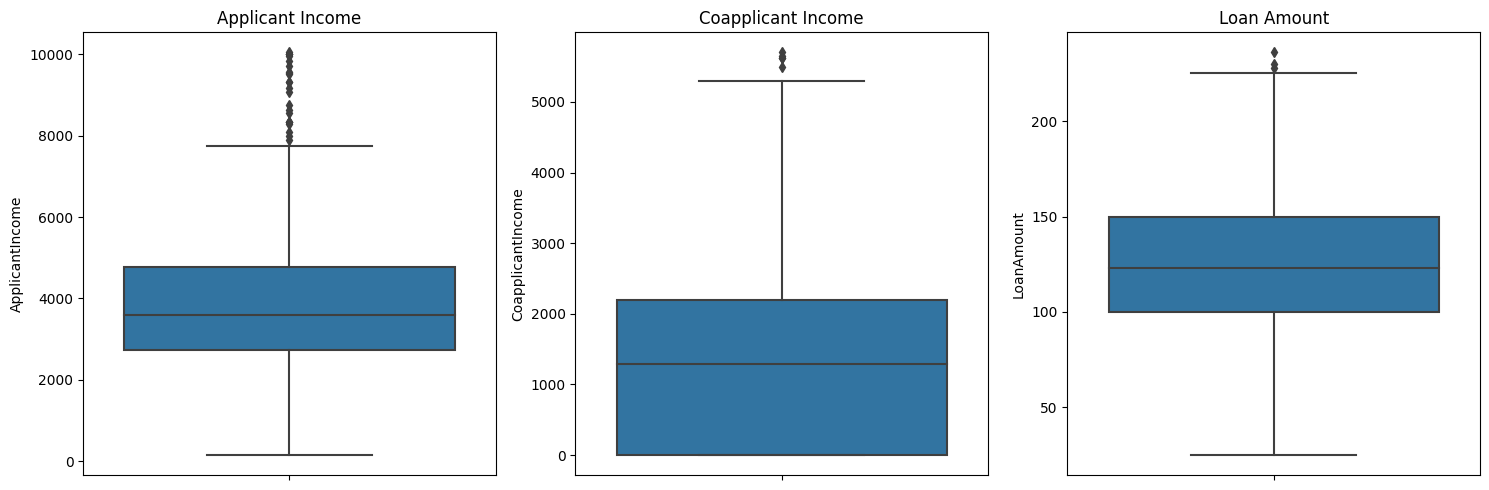

In [14]:
# Create horizontal boxplot for each variable
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='ApplicantIncome', data=df, orient='h')

plt.title('Applicant Income')
plt.subplot(1, 3, 2)
sns.boxplot(y='CoapplicantIncome', data=df, orient='h')

plt.title('Coapplicant Income')
plt.subplot(1, 3, 3)
sns.boxplot(y='LoanAmount', data=df, orient='h')

plt.title('Loan Amount')
plt.tight_layout()
plt.show()